### Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [1]:
# impoting necessary libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the csv dataset
wine_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [3]:
# exploring the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This dataset contains details of wines in which numerical data is present. The "quality" is the target variable which contains a score between 0 to 10. This can be viewed as a classification task.

In [4]:
# checking the shape of dataset
wine_data.shape

(1599, 12)

In [5]:
# checking for missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


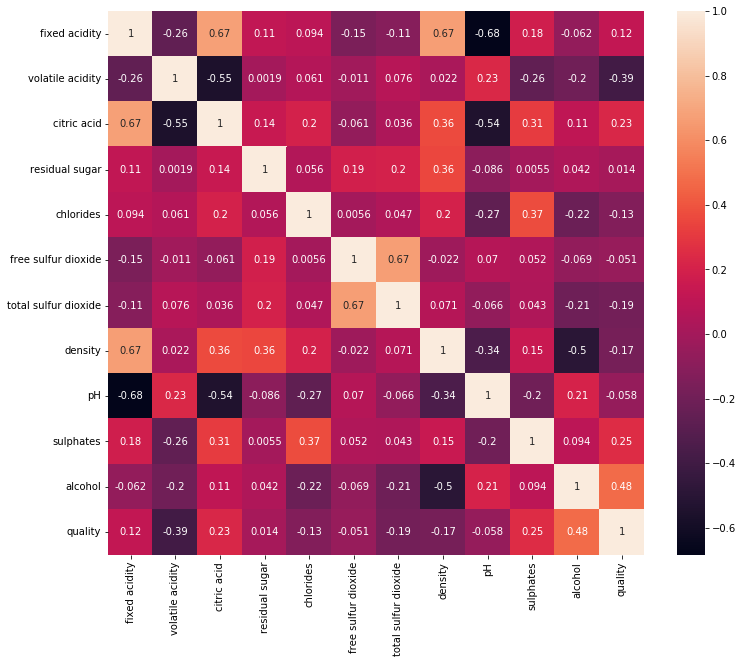

In [8]:
# visualizing the dataset
plt.figure(figsize = (12,10))
sns.heatmap(wine_data.corr(), annot = True)
plt.show()

In [9]:
wine_data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

This shows that more the alcohol content and suplahtes, more the quality and more the volatile acidity, lesser the quality.

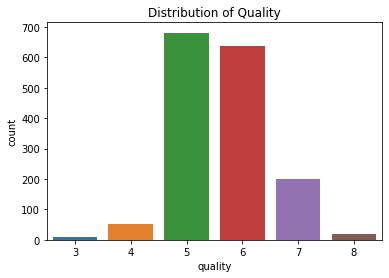

In [10]:
# visualization the target variable
sns.countplot(data=wine_data, x='quality')
plt.xlabel("quality")
plt.ylabel("count")
plt.title("Distribution of Quality")
plt.show()

Lets set a threshold for the target variable such that the quality values lower than that threshold have the same value and the qualiy values above that threshold have same values.

Let the threshold be 5. So, the new column new_quality can be created as:

In [11]:
threshold=6
wine_data['new_quality'] = np.where(wine_data['quality'] < threshold, 'Low', 'High')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low


In [12]:
wine_data['new_quality'].value_counts()

High    855
Low     744
Name: new_quality, dtype: int64

This threshold makes the target variable almost balanced.

In [13]:
# lets drop the quality column
wine_data.drop('quality', axis=1, inplace=True)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low


### Univariate Analysis



Distribution of Various Input Variables




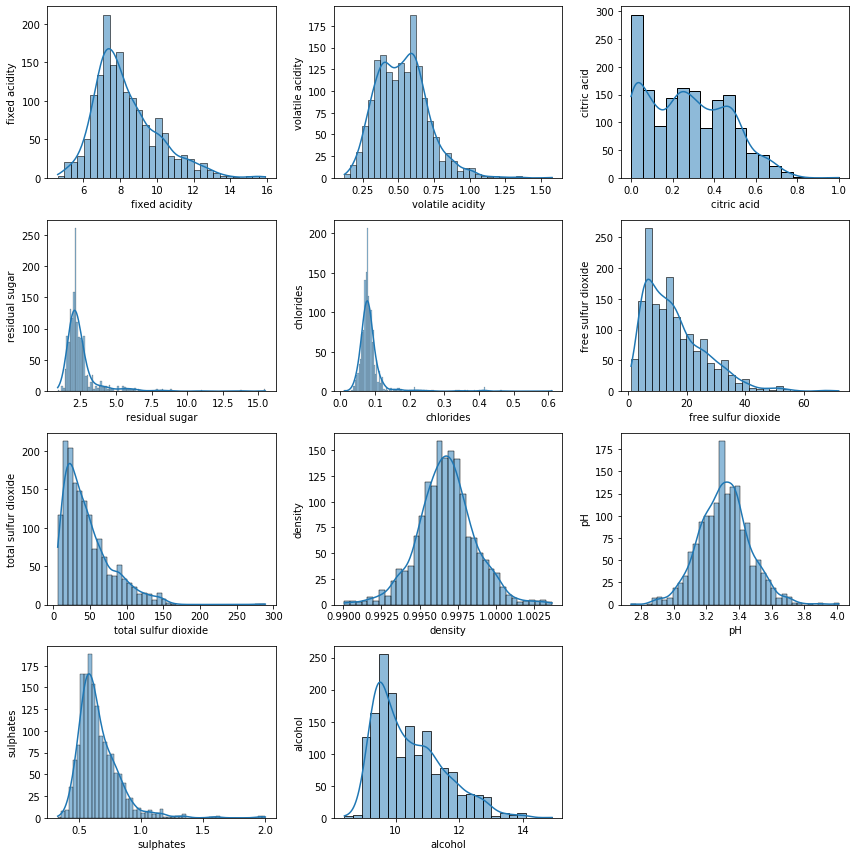

In [14]:
cols = list(wine_data.columns)[:11]

plt.figure(figsize=(12,12))
print("\n")
print("Distribution of Various Input Variables")
print("\n")

for i in range(11):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=wine_data, x=cols[i], kde=True)
    plt.ylabel(cols[i])

plt.tight_layout()
plt.show()


### Bivariate Analysis



Distribution of Various Input Variables versus Wine Quality




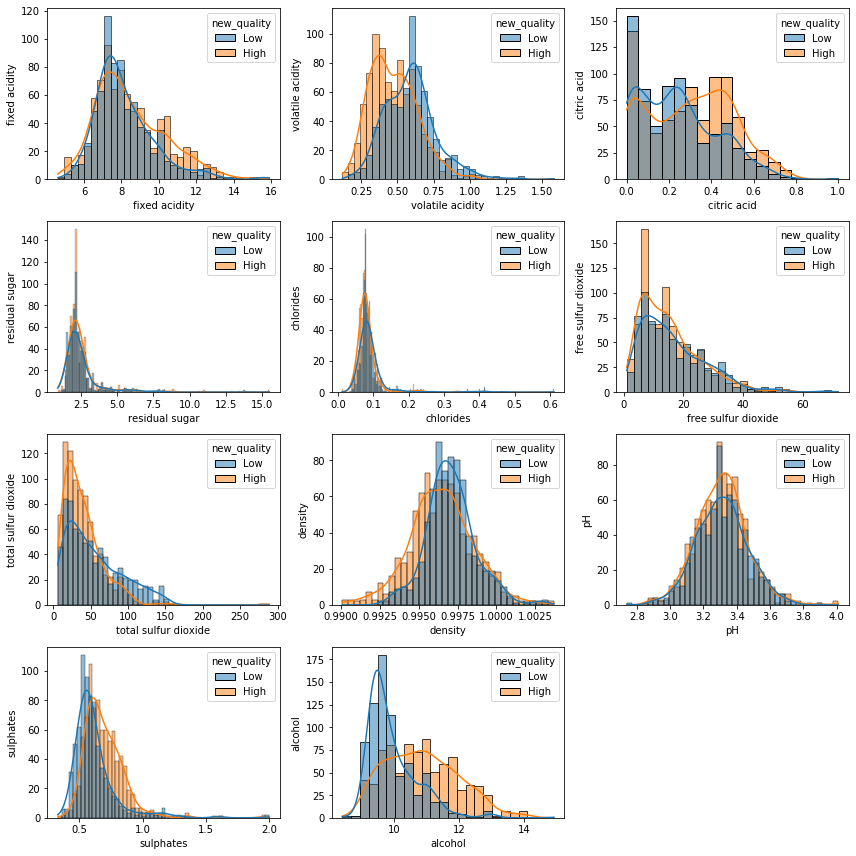

In [15]:
plt.figure(figsize=(12,12))
print("\n")
print("Distribution of Various Input Variables versus Wine Quality")
print("\n")

for i in range(11):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=wine_data, x=cols[i], hue='new_quality', kde=True)
    plt.ylabel(cols[i])

plt.tight_layout()
plt.show()


The histograms or density plots of volatile acidity, citric acid, total sulfur dioxide, sulfates, and alcohol shows noticeable differences in the shape of the distributions between 'high quality' and 'low quality' wines.

On the other hand, the independent variables fixed acidity, residual sugar, chlorides, free sulfur dioxide, density, and pH exhibit similar distribution curves for both high qualiy and bad quality wine observations.

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = wine_data.drop(columns = ['new_quality'])
y = wine_data['new_quality']

# scaling the dataset
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)



X_train shape (1119, 11)
X_test shape (480, 11)
y_train shape (1119,)
y_test shape (480,)


In [26]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('SVC', SVC()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier())]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    print("\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label='High')
    precision = precision_score(y_test, y_pred, pos_label='High')
    recall = recall_score(y_test, y_pred, pos_label='High')
    
    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)
    
print(scores_df)


Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


[[209  58]
 [ 73 140]]
              precision    recall  f1-score   support

        High       0.74      0.78      0.76       267
         Low       0.71      0.66      0.68       213

   micro avg       0.73      0.73      0.73       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.73      0.73      0.73       480

Model:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


[[196  71]
 [ 50 163]]
              precision    recall  f1-score   support

        High       0.80      0.73      0.76       267
         Low       0.70      0.77      0.73       213

   micro avg       0.75      0.75      0

In [27]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_s, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.671875   0.690625   0.7        0.65625    0.65830721]
Mean Score 0.6754114420062696
Difference between accuracy and cv score is:  0.08708855799373039


Model : SVC
cv_score : [0.7125     0.71875    0.7875     0.7375     0.73040752]
Mean Score 0.7373315047021943
Difference between accuracy and cv score is:  0.025168495297805626


Model : DecisionTree
cv_score : [0.625      0.61875    0.69375    0.68125    0.57680251]
Mean Score 0.6391105015673981
Difference between accuracy and cv score is:  0.12338949843260183


Model : RandomForest
cv_score : [0.709375   0.6875     0.728125   0.709375   0.73040752]
Mean Score 0.7129565047021944
Difference between accuracy and cv score is:  0.04954349529780555




SVC is the best classifier since it has the least difference between accuracy score and cross validation score.

In [28]:
# HyperParameter Tuning
parameters = {'kernel':('rbf','linear','sigmoid'), 'C':[1,10]}
grid = GridSearchCV(SVC(),parameters)
grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('rbf', 'linear', 'sigmoid'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [33]:
# final model
final = SVC(C=10, kernel='rbf')
final.fit(X_train, y_train)
final_pred = final.predict(X_test)
print("Accuracy_final :", accuracy_score(y_test,final_pred)*100)

Accuracy_final : 75.83333333333333


In [35]:
print('y_test :', y_test[:5])
print('y_pred :', final_pred[:5])

y_test : 803     High
124      Low
350     High
682      Low
1326    High
Name: new_quality, dtype: object
y_pred : ['Low' 'Low' 'High' 'Low' 'High']
